# upload whole dictionary

In [13]:
import os, os.path
from os.path import isfile, join
import fitz
import re

# Research

In [14]:
DIR = 'tests/test7/'
file = 'test7.2.JPG'
file_path = os.path.join(DIR, file)
doc = fitz.open(file_path+'.pdf')

mupdf: cannot open tests/test7/test7.2.JPG.pdf: No such file or directory


RuntimeError: cannot open tests/test7/test7.2.JPG.pdf: No such file or directory

looking for one text

In [3]:
#search_text='03-310 Warszawa tel +22 519 84 93 fax +22 519 84 81'
search_text="""Barttomiej Chmurzynski Dyrektor Sprzedazy
b.chmurzynski@innergo.pl +48 519 351 403"""
page = doc.loadPage(0)
areas = page.searchFor(search_text, hit_max = 16) #16-> max amount of rectangles
print(areas)

In [4]:
page_dict = page.getText('dict')
page_blocks = page.getText('blocks')
page_width = page_dict['width']
page_height = page_dict['height']
#page_dict
#using blocks cuz its easier
nonempty_blocks= []
i = 0
for block in page_blocks:
    if block[4] != ' ':
        nonempty_blocks.append(block)

print(len(page_blocks))
print(len(nonempty_blocks))

looking for multiple words in text

# 1-st case: find whole multipleliner

In [5]:
#texts_to_find=['tel','fax','warszawa']
texts_to_find = ['Barttomiej Chmurzynski Dyrektor Sprzedazy b.chmurzynski@innergo.pl +48 519 351 403', '+48 519 351 403', '+22 519 84 93', '+22 519 84 81']
boxes = []
for text in texts_to_find:
    boxes += page.searchFor(text)

print(boxes)

save file as pdf

In [6]:
for rectangle in boxes:
    _ = page.addRectAnnot(rectangle)
doc.save("a-freetexta.pdf")

# pdf2image aproach

In [7]:
from pdf2image import convert_from_path
import os
import tempfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
filename = 'tests/test6/test6.2.JPG.pdf'
image = convert_from_path(filename, size=(page_width, page_height))
image[0].save('saved_from_pdf.jpg', 'JPEG')


Note: theres different scale of image in pymu and matplotlib. Bounding boxes are in differend size. Magic number is ~2.8

131.0399932861328
460.0792236328125
253.67999267578125
283.69464111328125


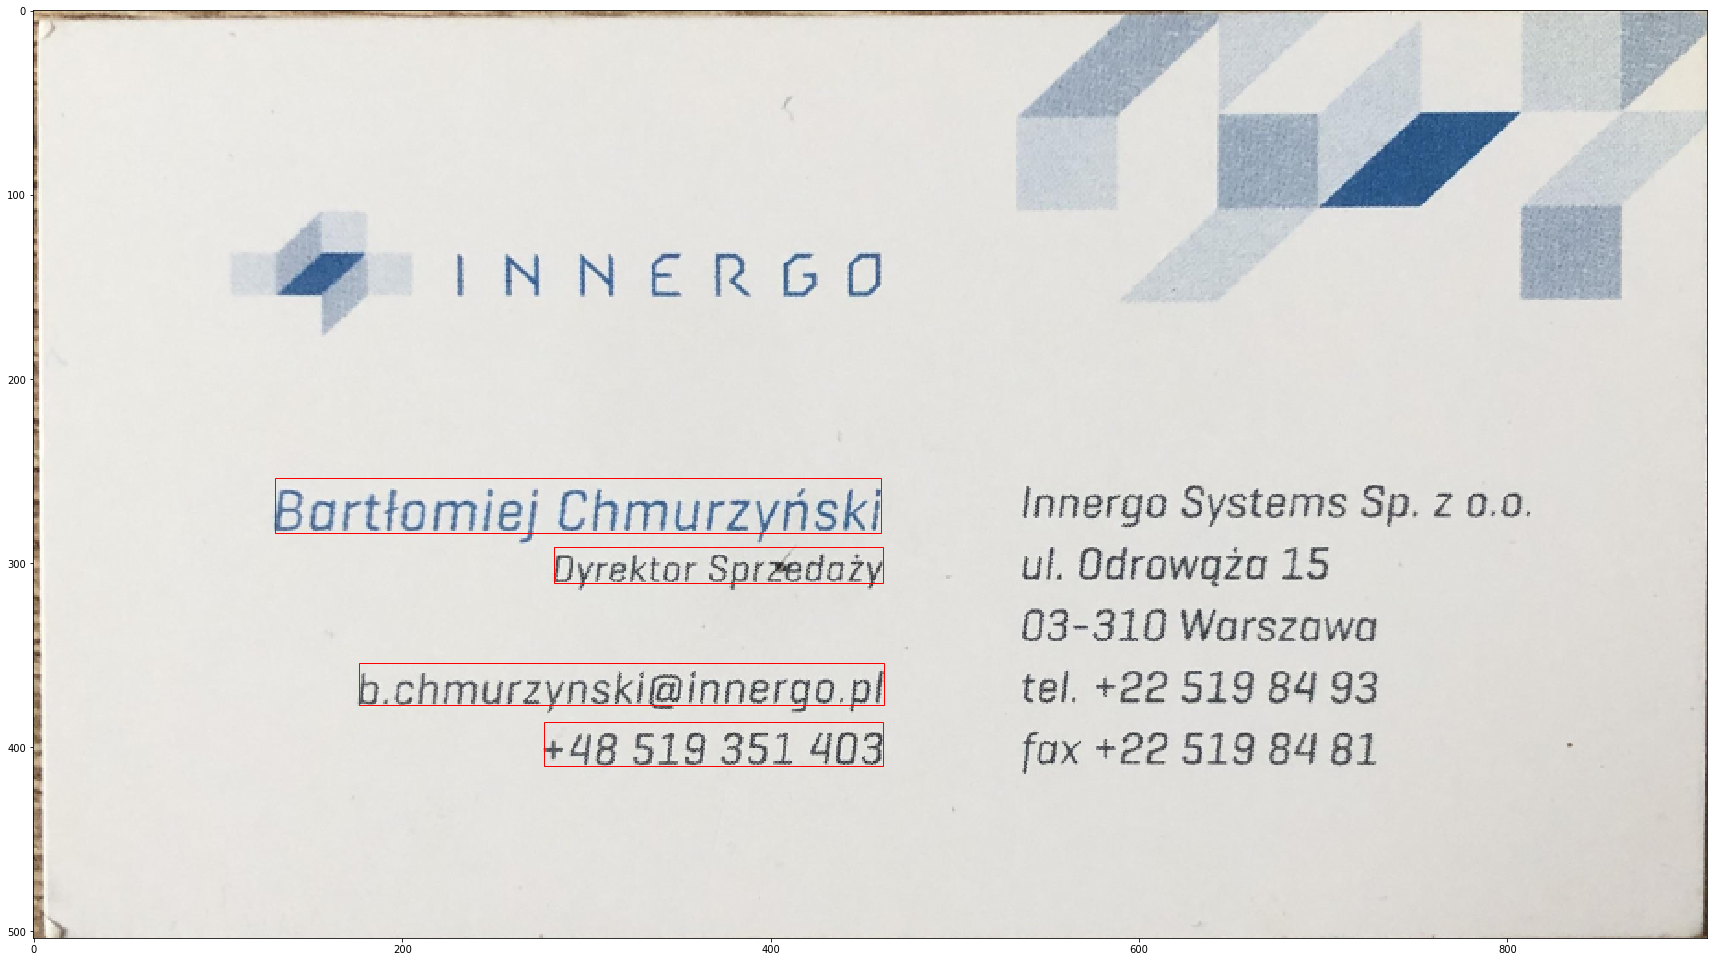

In [8]:
im = np.array(image[0], dtype=np.uint8)
fig,ax = plt.subplots(figsize=(30,20))
print(areas[0].x0)
print(areas[0].x1)
print(areas[0].y0)
print(areas[0].y1)
# Display the image
for rectangle in areas:
    rect = patches.Rectangle((rectangle.x0,rectangle.y0),(rectangle.x1-rectangle.x0),(rectangle.y1-rectangle.y0),linewidth=1,edgecolor='red',facecolor='none')
    ax.add_patch(rect)
    
ax.imshow(im)
plt.show()



In [9]:
#create a TextPage for the page
text = page.getTextPage()
#extract the page’s text
page_text = page.getText()
#
textpage = page.getTextPage()
textb = textpage.extractText()
textb
#text_blocks = textpage.extractBLOCKS() -> broaken
dictt = textpage.extractDICT()
dictt

{'width': 909.3599853515625,
 'height': 504.7200012207031,
 'blocks': [{'type': 0,
   'bbox': (-3.5999999046325684,
    162.67999267578125,
    6.840500354766846,
    319.75665283203125),
   'lines': [{'wmode': 0,
     'dir': (1.0, 0.0),
     'bbox': (-3.5999999046325684,
      162.67999267578125,
      6.840500354766846,
      319.75665283203125),
     'spans': [{'size': 57.256591796875,
       'flags': 12,
       'font': 'HZPQMS+GlyphLessFont',
       'color': 0,
       'text': ' ',
       'bbox': (-3.5999999046325684,
        162.67999267578125,
        6.840500354766846,
        319.75665283203125)}]}]},
  {'type': 0,
   'bbox': (435.239990234375,
    1.760009765625,
    766.7999877929688,
    5.761962890625),
   'lines': [{'wmode': 0,
     'dir': (1.0, 0.0),
     'bbox': (435.239990234375,
      1.760009765625,
      766.7999877929688,
      5.761962890625),
     'spans': [{'size': 51.50223159790039,
       'flags': 12,
       'font': 'HZPQMS+GlyphLessFont',
       'color': 0,
   

In [10]:
tel_reg_pat = r'\S+@\S+\.\S+'


emails = re.findall(tel_reg_pat, textb, re.IGNORECASE)
print(emails)

['b.chmurzynski@innergo.pl']


In [11]:
#regular expression to find emails
emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", textb, re.IGNORECASE)
#regular expression to find phone numbers
numbers = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', textb)

print(numbers)
print(emails)

['+48 519 351 403', '+22 519 84 93', '+22 519 84 81']
['b.chmurzynski@innergo.pl']
